# Métricas de Avaliação

Este notebook apresenta as principais métricas para avaliação de modelos de classificação.


In [1]:
# Imports básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)
import seaborn as sns

# Configuração de plotting
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

## Objetivos da Aula

- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- ROC Curve e AUC
- Escolha da métrica adequada


In [2]:
# Criação de dataset sintético para demonstração
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42
)

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dataset criado:")
print(f"- Treino: {X_train.shape[0]} amostras")
print(f"- Teste: {X_test.shape[0]} amostras")
print(f"- Distribuição treino: {np.bincount(y_train)}")
print(f"- Distribuição teste: {np.bincount(y_test)}")

# Treinamento de um modelo para demonstração
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# Predições
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva

print("\n✅ Modelo treinado e predições realizadas!")

Dataset criado:
- Treino: 700 amostras
- Teste: 300 amostras
- Distribuição treino: [351 349]
- Distribuição teste: [150 150]

✅ Modelo treinado e predições realizadas!


In [ ]:
# balanceado
teste = 300
classe_a = 150  # valor 0; verdadeiro; spam;
classe_b = 150  # valor 1; false; não-spam;
total = classe_a + classe_b  # =300
# teste
corretas = 280  # ~140 + 140 ... impossível 200 corretos de A (=<150) em média eu acertei 90%
corretas_2 = 280  # ~  0 + 140 ... impossível 200 corretos de A (=<150) em média eu acertei 46%

# não balanceado <- acurácia
teste = 300
classe_a = 50
classe_b = 250
# teste
corretas = 280  # ~40 + 240 .. (=<50 e =<250), é possível? sim 90% <- qual classe eu errei mais? não
corretas_2 = 280  # ~30 + 250 .. (=<50 e =<250), é possível? sim 90% <- qual classe eu errei mais? não
corretas_3 = 200  # ~ 0 + 250 .. (=<50 e =<250), é possível? sim 83% <- eu NÃO APRENDI a classe 0

## 1. Métricas Básicas de Classificação

### Accuracy (Acurácia)

A **acurácia** é a métrica mais simples e intuitiva: proporção de predições corretas.

$$\text{Accuracy} = \frac{\text{Predições Corretas}}{\text{Total de Predições}}$$

É útil quando as classes estão balanceadas, mas pode ser enganosa em casos de desbalanceamento.


📊 MÉTRICAS DE CLASSIFICAÇÃO
Accuracy:  0.923
Precision: 0.926
Recall:    0.920
F1-Score:  0.923


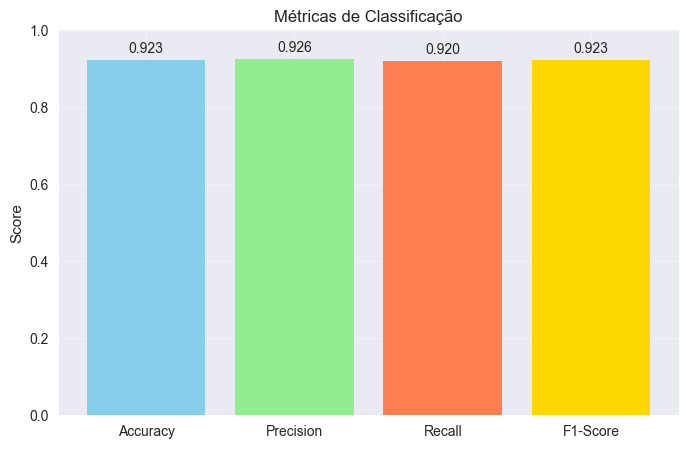

In [3]:
# Calculando métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 MÉTRICAS DE CLASSIFICAÇÃO")
print("=" * 40)
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

# Visualização das métricas
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=["skyblue", "lightgreen", "coral", "gold"])
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Métricas de Classificação")

# Adicionar valores nas barras
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{value:.3f}", ha="center", va="bottom")

plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
"""
TP -> true positives ou verdadeiros positivos
significado: o modelo disse "positivo (0..A)" e realmente era positivo.

TN -> true negatives ou verdadeiros negativos
significado: o modelo disse "negativo (1..B)" e realmente era negativo.

FP -> false positives ou falsos positivos
significado: modelo disse "positivo (A)" mas na verdade era negativo (B)

FN -> false negatives ou falsos negativos <------
significado: modelo disse "negativo (B)" mas na verdade era positivo (A)
"""

# não balanceado
teste = 300
classe_a = 50
classe_b = 250
# teste
corretas = 200  # ~ 0 + 250 .. (=<50 e =<250), é possível? sim 83% acurácia

### Precision, Recall e F1-Score

Para entender essas métricas, precisamos dos conceitos de **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)** e **False Negatives (FN)**.

**Precision (Precisão)**: Das predições positivas, quantas estavam corretas? (não quero classificar o e-mail importante como SPAM)
$$\text{Precision} = \frac{TP}{TP + FP}$$

**Recall (Revocação/Sensibilidade)**: Dos casos positivos reais, quantos foram identificados? (melhor soar o alarme de incêndio mesmo sem fogo!)
$$\text{Recall} = \frac{TP}{TP + FN}$$

**F1-Score**: Média harmônica entre Precision e Recall
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


## 2. Confusion Matrix (Matriz de Confusão)

A **matriz de confusão** é uma tabela que mostra as predições corretas e incorretas para cada classe, permitindo uma análise detalhada dos erros do modelo.


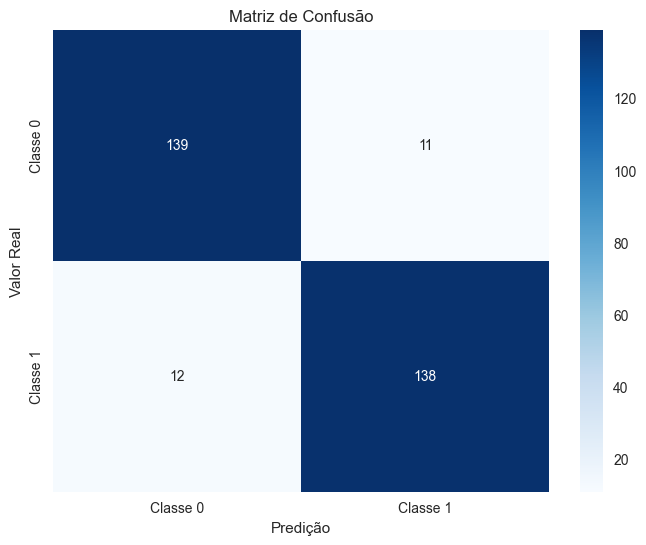

📈 COMPONENTES DA MATRIZ DE CONFUSÃO
True Negatives (TN):  139
False Positives (FP): 11
False Negatives (FN): 12
True Positives (TP):  138

📊 CÁLCULO MANUAL DAS MÉTRICAS
Accuracy:  0.923
Precision: 0.926
Recall:    0.920
Specificity: 0.927


In [4]:
# Criando e visualizando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotagem da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"]
)
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.show()

# Extraindo valores da matriz
tn, fp, fn, tp = cm.ravel()

print("📈 COMPONENTES DA MATRIZ DE CONFUSÃO")
print("=" * 45)
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

print("\n📊 CÁLCULO MANUAL DAS MÉTRICAS")
print("=" * 45)
print(f"Accuracy:  {(tp + tn) / (tp + tn + fp + fn):.3f}")
print(f"Precision: {tp / (tp + fp):.3f}")
print(f"Recall:    {tp / (tp + fn):.3f}")
print(f"Specificity: {tn / (tn + fp):.3f}")  # Taxa de verdadeiros negativos

In [5]:
# Classification Report - resumo completo
print("📋 CLASSIFICATION REPORT")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=["Classe 0", "Classe 1"]))

📋 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Classe 0       0.92      0.93      0.92       150
    Classe 1       0.93      0.92      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## 3. ROC Curve e AUC

A **ROC Curve** (Receiver Operating Characteristic) plota a Taxa de Verdadeiros Positivos vs Taxa de Falsos Positivos para diferentes thresholds.

A **AUC** (Area Under Curve) quantifica a qualidade do modelo: quanto maior (próximo de 1), melhor.


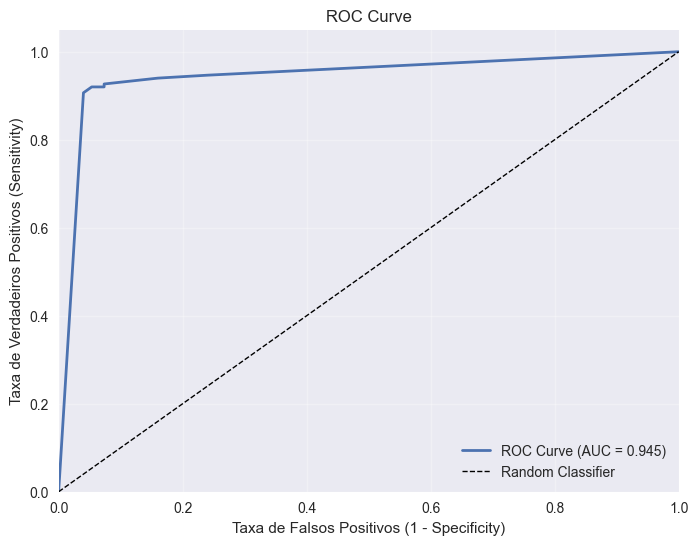

🎯 AUC Score: 0.945
📊 Interpretação: Excelente


In [6]:
# Calculando ROC Curve e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plotando ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f"ROC Curve (AUC = {auc_score:.3f})")
plt.plot([0, 1], [0, 1], "k--", linewidth=1, label="Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taxa de Falsos Positivos (1 - Specificity)")
plt.ylabel("Taxa de Verdadeiros Positivos (Sensitivity)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"🎯 AUC Score: {auc_score:.3f}")

# Interpretação do AUC
if auc_score >= 0.9:
    interpretation = "Excelente"
elif auc_score >= 0.8:
    interpretation = "Bom"
elif auc_score >= 0.7:
    interpretation = "Regular"
elif auc_score >= 0.6:
    interpretation = "Ruim"
else:
    interpretation = "Muito Ruim"

print(f"📊 Interpretação: {interpretation}")

## 4. Escolha da Métrica Adequada

A escolha da métrica depende do **contexto do problema** e do **custo dos erros**:

### Quando usar cada métrica:

**🎯 Accuracy**: Classes balanceadas e custos de erro similares

**⚖️ Precision**: Quando **False Positives são custosos**

- Ex: Diagnóstico médico (evitar alarmes falsos)
- Ex: Spam detection (evitar marcar emails legítimos como spam)

**🔍 Recall**: Quando **False Negatives são custosos**

- Ex: Detecção de fraude (não pode deixar passar fraudes)
- Ex: Diagnóstico de doenças graves (não pode deixar casos passarem)

**🔄 F1-Score**: Balanceamento entre Precision e Recall

**📈 AUC-ROC**: Avaliação geral, independente do threshold


In [7]:
# Exemplo prático: Dataset desbalanceado
from sklearn.datasets import make_classification

# Criando dataset desbalanceado (90% classe 0, 10% classe 1)
X_imb, y_imb = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    random_state=42,
)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb
)

print(f"Dataset Desbalanceado:")
print(f"- Distribuição treino: {np.bincount(y_train_imb)}")
print(f"- Proporções: {np.bincount(y_train_imb) / len(y_train_imb)}")

# Treinar modelo no dataset desbalanceado
clf_imb = DecisionTreeClassifier(random_state=42, max_depth=5)
clf_imb.fit(X_train_imb, y_train_imb)

# Predições
y_pred_imb = clf_imb.predict(X_test_imb)
y_proba_imb = clf_imb.predict_proba(X_test_imb)[:, 1]

# Comparando métricas
print("\n📊 COMPARAÇÃO DE MÉTRICAS - Dataset Desbalanceado")
print("=" * 55)
print(f"Accuracy:  {accuracy_score(y_test_imb, y_pred_imb):.3f}")
print(f"Precision: {precision_score(y_test_imb, y_pred_imb):.3f}")
print(f"Recall:    {recall_score(y_test_imb, y_pred_imb):.3f}")
print(f"F1-Score:  {f1_score(y_test_imb, y_pred_imb):.3f}")
print(f"AUC:       {roc_auc_score(y_test_imb, y_proba_imb):.3f}")

# Modelo "ingênuo" que sempre prediz classe majoritária
y_naive = np.zeros_like(y_test_imb)  # Sempre prediz classe 0
accuracy_naive = accuracy_score(y_test_imb, y_naive)

print(f"\n🤖 Modelo 'ingênuo' (sempre classe majoritária): {accuracy_naive:.3f}")
print("⚠️  Isso mostra por que accuracy pode ser enganosa!")

Dataset Desbalanceado:
- Distribuição treino: [626  74]
- Proporções: [0.89428571 0.10571429]

📊 COMPARAÇÃO DE MÉTRICAS - Dataset Desbalanceado
Accuracy:  0.970
Precision: 0.867
Recall:    0.839
F1-Score:  0.852
AUC:       0.966

🤖 Modelo 'ingênuo' (sempre classe majoritária): 0.897
⚠️  Isso mostra por que accuracy pode ser enganosa!


## 5. Resumo das Métricas

### 📋 Checklist para Escolha de Métricas

1. **Analisar o dataset**:

   - Classes balanceadas ou desbalanceadas?
   - Qual o tamanho dos dados?

2. **Entender o problema**:

   - Qual o custo de um falso positivo?
   - Qual o custo de um falso negativo?
   - Há preferência por sensibilidade ou especificidade?

3. **Selecionar métricas apropriadas**:
   - **Balanceado**: Accuracy, F1-Score, AUC
   - **Desbalanceado**: Precision, Recall, F1-Score, AUC
   - **Custo alto de FP**: Precision
   - **Custo alto de FN**: Recall

### 🎯 Principais Takeaways

- **Accuracy não é sempre a melhor métrica**
- **Precision vs Recall é um trade-off**
- **F1-Score equilibra Precision e Recall**
- **AUC é útil para comparar modelos**
- **A escolha depende do contexto do negócio**


In [8]:
# Comparação final de métricas
def evaluate_model(y_true, y_pred, y_proba, model_name="Modelo"):
    """Função utilitária para avaliar um modelo com todas as métricas"""

    results = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba),
    }

    print(f"📊 {model_name}")
    print("-" * 30)
    for metric, value in results.items():
        print(f"{metric:10}: {value:.3f}")

    return results


# Avaliando nosso modelo principal
print("🏆 AVALIAÇÃO FINAL")
print("=" * 40)
results = evaluate_model(y_test, y_pred, y_proba, "Decision Tree")

print(f"\n✅ Lição 03 - Métricas de Avaliação concluída!")
print("Próxima aula: Hyperparameter Tuning")

🏆 AVALIAÇÃO FINAL
📊 Decision Tree
------------------------------
Accuracy  : 0.923
Precision : 0.926
Recall    : 0.920
F1-Score  : 0.923
AUC       : 0.945

✅ Lição 03 - Métricas de Avaliação concluída!
Próxima aula: Hyperparameter Tuning
